In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

import tinyDA as tda

In [11]:
b = 1
m = 2
x = np.linspace(0,1)
y_pure = b + m*x

sigma = 0.2
y = y_pure + np.random.normal(scale=sigma, size=x.shape[0])

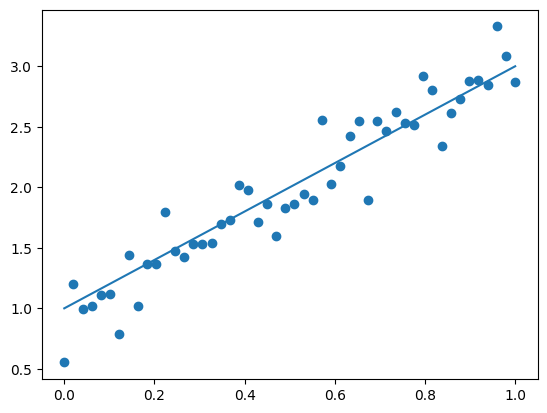

In [12]:
plt.plot(x, y_pure)
plt.scatter(x, y)
plt.show()

In [13]:
mean_prior = np.zeros(2)
cov_prior = np.eye(2)
cov_likelihood = sigma**2*np.eye(x.shape[0])

my_prior = multivariate_normal(mean_prior, cov_prior)
my_loglike = tda.GaussianLogLike(y, cov_likelihood)

In [14]:
# define a model.
def my_model(parameters):
    return parameters[0] + parameters[1]*x

In [15]:
my_posterior = tda.Posterior(my_prior, my_loglike, my_model)

In [16]:
#rwmh_cov = np.eye(2)
#rmwh_scaling = 0.1
#rwmh_adaptive = True
#my_kernel = tda.GaussianRandomWalk(C=rwmh_cov, scaling=rmwh_scaling, adaptive=rwmh_adaptive)

pcn_scaling = 0.1
pcn_adaptive = False
my_kernel = tda.CrankNicolson(scaling=pcn_scaling, adaptive=pcn_adaptive)

#am_cov = np.eye(2)
#am_t0 = 2000
#am_sd = 1
#am_epsilon = 1e-6
#my_kernel = tda.AdaptiveMetropolis(C0=am_cov, t0=am_t0, sd=am_sd, epsilon=am_epsilon)

my_proposal = tda.MultipleTry(my_kernel, 3)

2025-05-27 13:48:31,963	INFO worker.py:1619 -- Calling ray.init() again after it has already been called.


In [17]:
import os
if "CI" in os.environ:
    iterations = 120
    burnin = 20
else:
    iterations = 12000
    burnin = 2000

In [ ]:
my_chains = tda.sample(my_posterior, my_proposal, iterations=iterations, n_chains=2)

Sampling chain 1/2


Running chain, α = 1.00:   0%|          | 0/12000 [00:00<?, ?it/s]

Running chain, α = 0.72:  31%|███       | 3674/12000 [00:59<02:15, 61.66it/s]


OutOfMemoryError: Task was killed due to the node running low on memory.
Memory on the node (IP: 129.206.226.243, ID: e41a738ce8c4865653a9f13ce035d144aa4972e7f0286aeb5e55b83d) where the task (actor ID: c83cae82f7a06dca3c4d47c201000000, name=RemotePosterior.__init__, pid=318026, memory used=0.13GB) was running was 14.53GB / 15.30GB (0.950034), which exceeds the memory usage threshold of 0.95. Ray killed this worker (ID: 2b03cdc4a7ec76d48fa3a31f986b933b1223e4ad1768c9246a0c9690) because it was the most recently scheduled task; to see more information about memory usage on this node, use `ray logs raylet.out -ip 129.206.226.243`. To see the logs of the worker, use `ray logs worker-2b03cdc4a7ec76d48fa3a31f986b933b1223e4ad1768c9246a0c9690*out -ip 129.206.226.243. Top 10 memory users:
PID	MEM(GB)	COMMAND
9624	0.76	/snap/code/191/usr/share/code/code /home/louisekluge/.vscode/extensions/ms-python.vscode-pylance-202...
222932	0.52	/snap/firefox/6042/usr/lib/firefox/firefox -contentproc -isForBrowser -prefsHandle 0 -prefsLen 40893...
9005	0.50	/snap/code/191/usr/share/code/code --type=renderer --crashpad-handler-pid=8940 --enable-crash-report...
310394	0.49	/snap/firefox/6042/usr/lib/firefox/firefox -contentproc -isForBrowser -prefsHandle 0 -prefsLen 40894...
289476	0.48	/snap/notion-snap-reborn/51/notion-snap-reborn --type=zygote --no-sandbox
128645	0.42	/proc/self/exe --type=renderer --enable-crash-reporter=8c86d461-41ab-49a6-85de-0a904a9e2d5e,no_chann...
311568	0.37	/home/louisekluge/miniconda3/envs/tda/bin/python -m ipykernel_launcher --f=/run/user/1000/jupyter/ru...
5513	0.36	/snap/firefox/6042/usr/lib/firefox/firefox https://statics.teams.cdn.office.net/evergreen-assets/saf...
217451	0.29	/snap/element-desktop/146/opt/Element/element-desktop --type=zygote --disable-seccomp-filter-sandbox...
287898	0.27	/snap/slack/196/usr/lib/slack/slack --type=zygote --no-sandbox
Refer to the documentation on how to address the out of memory issue: https://docs.ray.io/en/latest/ray-core/scheduling/ray-oom-prevention.html. Consider provisioning more memory on this node or reducing task parallelism by requesting more CPUs per task. Set max_restarts and max_task_retries to enable retry when the task crashes due to OOM. To adjust the kill threshold, set the environment variable `RAY_memory_usage_threshold` when starting Ray. To disable worker killing, set the environment variable `RAY_memory_monitor_refresh_ms` to zero.

: 

In [ ]:
idata = tda.to_inference_data(my_chains, burnin=burnin)

/home/mikkel/venv/tinyda/lib/python3.8/site-packages/arviz/data/inference_data.py:146: UserWarning: qoi group is not defined in the InferenceData scheme
  warnings.warn(


In [ ]:
import arviz as az

In [ ]:
az.summary(idata)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
theta_0,1.068,0.096,0.891,1.251,0.003,0.002,873.0,1528.0,1.01
theta_1,1.892,0.164,1.578,2.205,0.006,0.004,674.0,1256.0,1.00


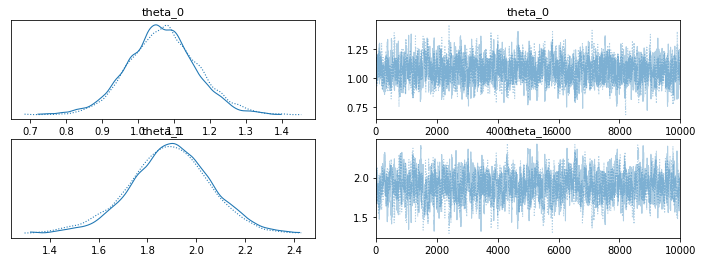

In [ ]:
az.plot_trace(idata)
plt.show()